###### To solve a puzzle, you are given an initial state and a goal state.
###### Target is to reach goal state from initial state using puzzle rules.
######  We can move blank tile only on left, right, up, and down
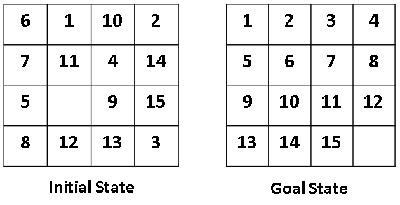

# Generate an intial state of NPuzzle

In [93]:
import matplotlib.pyplot as plt
import random
import math
import numpy as np

def drawPuzzle(state):
    n = int(math.sqrt(len(state)))
    grid = np.array(state).reshape(n, n)

    fig, ax = plt.subplots()
    cmap = plt.cm.Blues
    ax.matshow(grid != 0, cmap=cmap)  # show nonzero tiles as blue, 0 as white

    for i in range(n):
        for j in range(n):
            val = grid[i, j]
            if val != 0:
                ax.text(j, i, str(val), va='center', ha='center', fontsize=16, color='white', weight='bold')

    ax.set_xticks(np.arange(-0.5, n, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, n, 1), minor=True)
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=1)
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

    plt.show()


Initial state: [1, 0, 9, 19, 14, 21, 15, 6, 2, 10, 5, 20, 24, 13, 4, 11, 7, 18, 23, 22, 17, 16, 12, 8, 3]


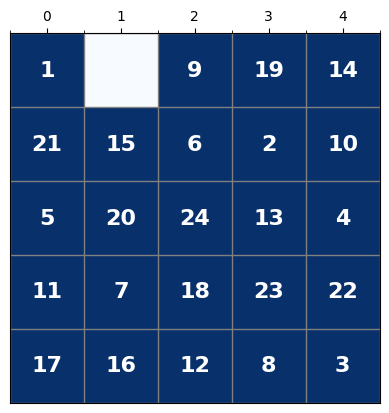

In [91]:
def generateState(n):
    if n is None:
      n = random.choice([3,4,5])
    state = list(range(n**2))
    random.shuffle(state)
    return state
initialState = generateState(None)
print("Initial state:", initialState)
drawPuzzle(initialState)

**Get Dimension**

In [53]:
def dimension(state):
  return int(math.sqrt(len(state)))

dimension(initialState)

5

# Calculate inversion

Inversion is a pair of tiles that are in the reverse order from where they ought to be. In our case, the bigger number is in front of the smaller one.



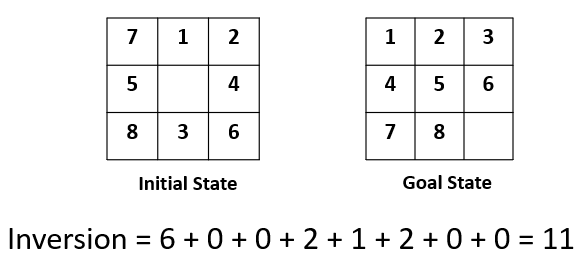

In [25]:
def inversionCount(state):
    count = 0
    for i, a in enumerate(state):
      if a > 0:
        for b in state[i+1:]:
          if b > 0 and a > b:
            count += 1
    return count

inversionCount(initialState)

43

In [26]:
initialState.index(0)

5

# **Find blank row**

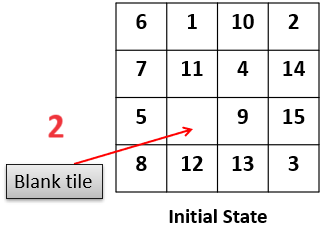

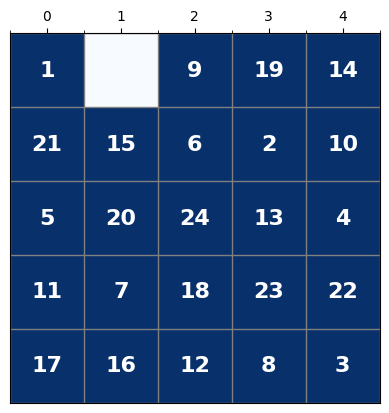

Blank tile is in row: 5


In [94]:

def blankTileRow(state):
    n = int(math.sqrt(len(state)))
    grid = np.array(state).reshape(n, n)
    for i in range(n):
        if 0 in grid[i]:
            return n - i
    return -1

def drawPuzzle(state):
    n = int(math.sqrt(len(state)))
    grid = np.array(state).reshape(n, n)

    fig, ax = plt.subplots()
    cmap = plt.cm.Blues
    ax.matshow(grid != 0, cmap=cmap)

    for i in range(n):
        for j in range(n):
            val = grid[i, j]
            if val != 0:
                ax.text(j, i, str(val), va='center', ha='center', fontsize=16, color='white', weight='bold')

    ax.set_xticks(np.arange(-0.5, n, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, n, 1), minor=True)
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=1)
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

    plt.show()

# execution
rowIndex = blankTileRow(initialState)
drawPuzzle(initialState)
print(f"Blank tile is in row: {rowIndex}")


# Solvability Rules

In [86]:
import math
import numpy as np

def dimension(state):
    return int(math.sqrt(len(state)))

def inversionCount(state):
    inv_count = 0
    flat = [tile for tile in state if tile != 0]
    for i in range(len(flat)):
        for j in range(i + 1, len(flat)):
            if flat[i] > flat[j]:
                inv_count += 1
    return inv_count

def blankTileRow(state):
    N = dimension(state)
    grid = np.array(state).reshape(N, N)
    for i in range(N):
        if 0 in grid[i]:
            return i

def isSolvable(state):
    N = dimension(state)
    I = inversionCount(state)
    R = blankTileRow(state)
    row_from_bottom = N - R

    if N % 2 == 1:
        return I % 2 == 0
    else:
        if row_from_bottom % 2 == 0:
            return I % 2 == 1
        else:
            return I % 2 == 0


In [87]:
isSolvable(initialState)

False

Generate a solvable state.

Searching for a solvable state... (Max steps: 100)


[Success] A solvable state was found at step 3!


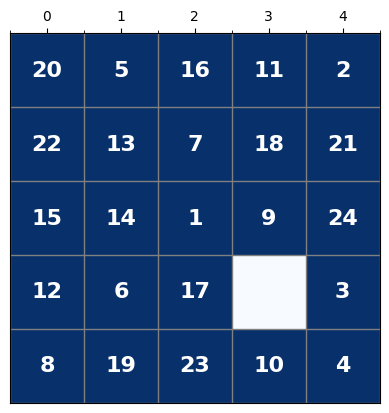

[20,
 5,
 16,
 11,
 2,
 22,
 13,
 7,
 18,
 21,
 15,
 14,
 1,
 9,
 24,
 12,
 6,
 17,
 0,
 3,
 8,
 19,
 23,
 10,
 4]

In [95]:
def findSolvableState(max_steps=100):
    print(f'Searching for a solvable state... (Max steps: {max_steps})\n')

    for steps in range(1, max_steps + 1):
        s = generateState(None)

        if isSolvable(s):
            print(f'\n[Success] A solvable state was found at step {steps}!')
            drawPuzzle(s)
            return s

        if steps % 10 == 0:
            print(f'\n Attempted {steps} states so far...')

    print(f'\n[Failure] No solvable state was found in the first {max_steps} steps.')
    return None

findSolvableState()
